<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%982_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [10]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target)

In [13]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')

In [ ]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)

In [15]:
print("acc:",accuracy_score(y_test,pred))

acc: 0.9230769230769231


In [17]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

LogisticRegression ===
acc: 0.916083916083916
KNeighborsClassifier ===
acc: 0.9230769230769231


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
df['label'] = cancer.target

In [21]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()
ss.fit(cancer.data)
scaled_data = ss.transform(cancer.data)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 cancer.target)

In [25]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')

In [28]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)
print("acc:",accuracy_score(y_test,pred))

acc: 0.965034965034965


In [29]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

LogisticRegression ===
acc: 0.958041958041958
KNeighborsClassifier ===
acc: 0.958041958041958


## 랜덤 포리스트

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
dir_path = '/content/drive/MyDrive/UHD/'

In [40]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])


In [45]:
x_train.shape,x_test.shape

((7352, 561), (2947, 561))

In [44]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
 2   dup_cnt       561 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.5+ KB


In [54]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [55]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("acc:",accuracy_score(y_test,pred))

<ipython-input-55-0013b0ff8e28>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


acc: 0.9314557176789956


In [57]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

LogisticRegression ===
acc: 0.9579233118425518
KNeighborsClassifier ===
acc: 0.9015948422124194


In [60]:
ss = StandardScaler()
ss.fit(x_train)
scaled_xtr = ss.transform(x_train)
scaled_xte = ss.transform(x_test)

In [62]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[vo,rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier ===
acc: 0.9457074991516796


<ipython-input-62-adb67f1ba0df>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_xtr,y_train)


RandomForestClassifier ===
acc: 0.9300984051577876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

LogisticRegression ===
acc: 0.9541907024092298
KNeighborsClassifier ===
acc: 0.8802171700033933


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
params = {
    'max_depth':[4,8,12,16,20],
    'min_samples_leaf':[1,4,10,15],
    'min_samples_split':[2,4,6,8]
}

In [65]:
rf = RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rf,param_grid=params)
gs.fit(x_train,y_train)
print("best:",gs.best_params_)
print("acc:",gs.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

best: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 6}
acc: 0.9266918242483941


In [66]:
model = gs.best_estimator_

In [67]:
pred = model.predict(x_test)

In [68]:
print('acc:',accuracy_score(y_test,pred))

acc: 0.9239904988123515


In [69]:
sd = pd.Series(model.feature_importances_)
sd.index = x_train.columns

In [72]:
top20 = sd.sort_values(ascending=False)[:20]

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

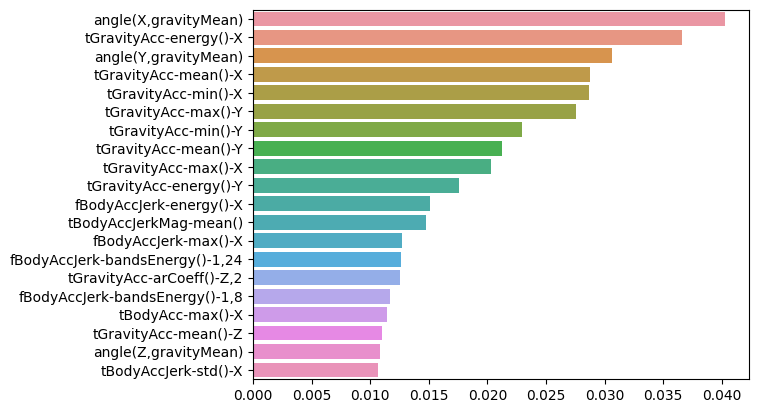

In [77]:
sns.barplot(x=top20,y=top20.index)
plt.show()